<a href="https://colab.research.google.com/github/KinzaaSheikh/Stable_Diffusion_Transformer/blob/main/Stable_Diffusion_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pytorch-fid torch diffusers clip transformers accelerate

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 50.4 MB/s eta 0:00:00


In [ ]:
from typing import List
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline, DDPMScheduler

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
def load_model(model_id: str) -> StableDiffusionPipeline:
  """Load model with provided model_id."""
  return StableDiffusionPipeline.from_pretrained(
      model_id,
      torch_dtype = torch.float16,
      revision = "fp16",
      use_auth_token = False
  ).to("cuda")

def generate_images(
    pipe: StableDiffusionPipeline,
    prompts: List[str]
) -> torch.Tensor:
  """Generate images based on provided prompts."""
  with torch.autocast("cuda"):
    images = pipe(prompts).images
  return images

def render_images(images: torch.Tensor):
  """Plot the generated images."""
  plt.figure(figsize=(10, 5))
  for i, img in enumerate(images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.axis("off")
  plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': False} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a2275

  0%|          | 0/50 [00:00<?, ?it/s]

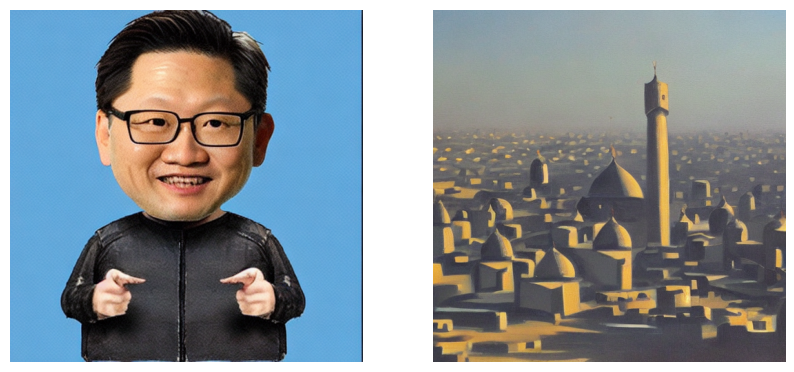

In [ ]:
# Execute the code
model_id = "CompVis/stable-diffusion-v1-4"
prompts = [
    "An chibi version of Jensen Huang",
    "A stylized oil painting of Old Baghdad"
]

pipe = load_model(model_id)
images = generate_images(pipe, prompts)
render_images(images)

# **Scoring Output with CLIP**

CLIP is trained to understand the relationship between text and images. That's how it scores whether the output accurately represent the text

In [ ]:
from typing import List, Tuple
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import torch

In [ ]:
# Load CLIP model, processor, and necessary parameters

CLIP_REPO = "openai/clip-vit-base-patch32"
def load_model_and_processor (
    model_name: str
) -> Tuple[CLIPModel, CLIPProcessor]:
        """
        Loads the CLIP model and Processor
        """
        model = CLIPModel.from_pretrained(model_name)
        processor = CLIPProcessor.from_pretrained(model_name)
        return model, processor

In [ ]:
# Define a processing function to adjust textual prompts and images in order to ensure correct formatting

def process_inputs (
    processor: CLIPProcessor, prompts: List[str],
    images: List[Image.Image]
) -> dict:
  """Processes the inputs using the CLIP processor."""
  return processor(text=prompts, images=images, return_tensors="pt", padding=True)

In [ ]:
# Calculate the probability of an image aligning with given prompts

def get_probabilities(
    model: CLIPModel, inputs: dict
) -> torch.Tensor:
  """
  Compute the probabilities using the CLIP model
  """
  outputs = model(**inputs)
  logits = outputs.logits_per_image
  #Define temp - higher temps make the distribution more uniform
  temp = 10
  # Apply the defined temps to the logits
  temp_adjusted_logits = logits / temp
  probs = torch.nn.functional.softmax(
      temp_adjusted_logits, dim=1
  )
  return probs


In [ ]:
def display_images_with_scores (
    images: List[Image.Image], scores: torch.Tensor
) -> None:
  """
  Displays the images alongside their scores
  """
  # Set print options for readability
  torch.set_printoptions(precision = 2, sci_mode=False)
  for i, image in enumerate(images):
    print(f"Image {i + 1}:")
    display(image)
    print(f"Scores: {scores[i, :]}")
    print()

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Image 1:


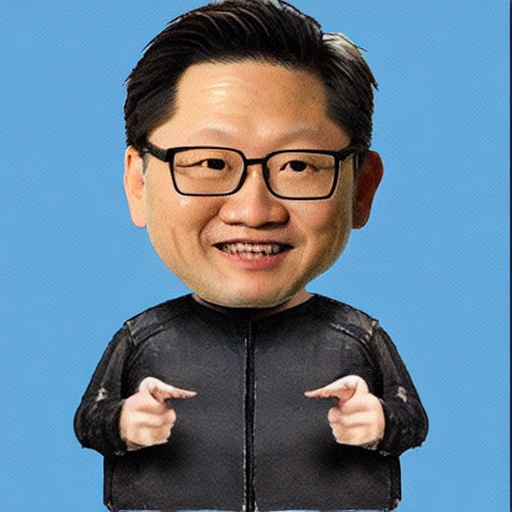

Scores: tensor([0.91, 0.09], grad_fn=<SliceBackward0>)

Image 2:


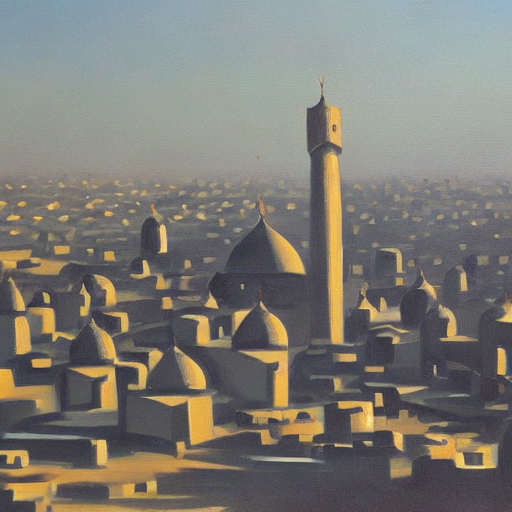

Scores: tensor([0.10, 0.90], grad_fn=<SliceBackward0>)



In [ ]:
# Execute the pipeline

# Load CLIP model
model, processor = load_model_and_processor(CLIP_REPO)
# Process image and text inputs together
inputs = process_inputs(processor, prompts, images)
# Extract probabilities
probs = get_probabilities(model, inputs)
# Display each image with corresponding scores
display_images_with_scores(images, probs)